# This Notebook is designed to go through the Capstone 2 :Data Wrangling and Exploratory Data Analysis portions of the Springboard Data Science Career Track

- Data Collection
    Goal: Organize your data to streamline the next steps of your capstone
    Time estimate: 1-2 hours
        Data loading
        Data joining
        Hint: Data Collection will require the use of the pandas library, and functions like read_csv(), depending on the type of data you want to read in!
        Hint: when adding one dataset to another, make sure you use the right function: you might want to merge, join, or concatenate.
- Data Organization
    Goal: Create a file structure and add your work to the GitHub repository you’ve created for this project.
    Time estimate: 1-2 hours
        File structure
        GitHub
        Hint: the glob library could come in handy here…
        Remind yourself of why GitHub is useful. What are the main motivations for making a GitHub repository?
- Data Definition
    Goal: Gain an understanding of your data features to inform the next steps of your project.
    Time estimate: 1-2 hours
        Column names
        Data types
        Description of the columns
        Counts and percents unique values
        Ranges of values
        - Hint: here are some useful questions to ask yourself during this process:
        - Do your column names correspond to what those columns store?
        - Check the data types of your columns. Are they sensible?
        - Calculate summary statistics for each of your columns, suchas mean, median, mode, standard deviation, range, and number of unique values. What does this tell you about your data? What do you now need to investigate?
- Data Cleaning
    Goal: Clean up the data in order to prepare it for the next steps of your project.
    Time estimate: 1-2 hours
        NA or missing values
        Duplicates
            Hint: don’t forget about the following awesome Python functions for data cleaning, which make life a whole lot easier:
- loc[] - filter your data by label
- iloc[] - filter your data by indexes
- apply() - execute a function across an axis of a DataFrame
- drop() - drop columns from a DataFrame
- is_unique() - check if a column is a unique identifier
- Series methods, such as str.contains(), which can be used to check if a certain substring occurs in a string of a Series, and str.extract(), which can be used to extract capture groups with a certain regex (or regular expression) pattern
- numPy methods like .where(), to clean columns. Recall that such methods have the structure: np.where(condition, then, else)
- DataFrame methods to check for null values, such as df.isnull().values.any()


In [1]:
#import modules that we will be using. 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sms

In [2]:
# Data loading
#data is sourced from kaggle
data_url = 'https://www.kaggle.com/datasets/paultimothymooney/denver-crime-data'


#import .csv file into pandas DataFrame called denver_crime:

denver_crime = pd.read_csv('data/crime.csv',index_col=0)

In [3]:
#explore the dataset
denver_crime.shape

(470278, 19)

In [4]:
#470,000 + rows of crimes, and 19 columns. Lets see what these are...
denver_crime.columns

Index(['incident_id', 'offense_id', 'OFFENSE_CODE', 'OFFENSE_CODE_EXTENSION',
       'OFFENSE_TYPE_ID', 'OFFENSE_CATEGORY_ID', 'FIRST_OCCURRENCE_DATE',
       'LAST_OCCURRENCE_DATE', 'REPORTED_DATE', 'INCIDENT_ADDRESS', 'GEO_X',
       'GEO_Y', 'GEO_LON', 'GEO_LAT', 'DISTRICT_ID', 'PRECINCT_ID',
       'NEIGHBORHOOD_ID', 'IS_CRIME', 'IS_TRAFFIC'],
      dtype='object')

In [5]:
#looks like we have some geographic information as well as date/time data. 
denver_crime.head()

,incident_id,offense_id,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,20226000193,20226000193299900,2999,0,criminal-mischief-other,public-disorder,2022-01-04 11:30:00,2022-01-04 12:00:00,2022-01-04 20:36:00,128 S CANOSA CT,3135366.0,1685410.0,-105.018825,39.714268,4.0,411.0,valverde,1,0
1,20223319,20223319299900,2999,0,criminal-mischief-other,public-disorder,2022-01-03 06:45:00,NaN,2022-01-03 11:01:00,650 15TH ST,3142454.0,1696151.0,-104.993418,39.743649,6.0,611.0,cbd,1,0
2,20223093,20223093299900,2999,0,criminal-mischief-other,public-disorder,2022-01-03 01:00:00,NaN,2022-01-03 06:11:00,919 E COLFAX AVE,3147484.0,1694898.0,-104.975557,39.740130,6.0,621.0,north-capitol-hill,1,0
3,20224000,20224000299900,2999,0,criminal-mischief-other,public-disorder,2022-01-03 19:47:00,NaN,2022-01-03 21:12:00,2345 W ALAMEDA AVE,3136478.0,1684414.0,-105.014892,39.711518,4.0,411.0,valverde,1,0
4,20223956,20223956299900,2999,0,criminal-mischief-other,public-disorder,2022-01-03 17:06:00,NaN,2022-01-03 20:31:00,7800 E SMITH RD,3169237.0,1705800.0,-104.897950,39.769688,5.0,512.0,central-park,1,0


In [6]:
#convert time columns to datetime format
#select columns to change
date_columns = ['FIRST_OCCURRENCE_DATE','LAST_OCCURRENCE_DATE', 'REPORTED_DATE']

#apply change to columns, being sure to '=' them so as to make the change permanent
denver_crime[date_columns] = denver_crime[date_columns].apply(pd.to_datetime)

In [7]:
# Now lets see the datatypes
denver_crime.dtypes

incident_id                        int64
offense_id                         int64
OFFENSE_CODE                       int64
OFFENSE_CODE_EXTENSION             int64
OFFENSE_TYPE_ID                   object
OFFENSE_CATEGORY_ID               object
FIRST_OCCURRENCE_DATE     datetime64[ns]
LAST_OCCURRENCE_DATE      datetime64[ns]
REPORTED_DATE             datetime64[ns]
INCIDENT_ADDRESS                  object
GEO_X                            float64
GEO_Y                            float64
GEO_LON                          float64
GEO_LAT                          float64
DISTRICT_ID                      float64
PRECINCT_ID                      float64
NEIGHBORHOOD_ID                   object
IS_CRIME                           int64
IS_TRAFFIC                         int64
dtype: object

In [8]:
#Now lets look for missing values.
denver_crime.isna().sum()

incident_id                    0
offense_id                     0
OFFENSE_CODE                   0
OFFENSE_CODE_EXTENSION         0
OFFENSE_TYPE_ID                0
OFFENSE_CATEGORY_ID            0
FIRST_OCCURRENCE_DATE          0
LAST_OCCURRENCE_DATE      295750
REPORTED_DATE                  0
INCIDENT_ADDRESS           37865
GEO_X                       4031
GEO_Y                       4031
GEO_LON                     4032
GEO_LAT                     4032
DISTRICT_ID                    1
PRECINCT_ID                    1
NEIGHBORHOOD_ID                1
IS_CRIME                       0
IS_TRAFFIC                     0
dtype: int64

In [9]:
# there are nearly 30k dates missing from LAST_OCCURANCE_DATE. 
#since this column wont be useful to our analysis, lets just drop it
denver_crime.drop(['LAST_OCCURRENCE_DATE'],axis=1,inplace=True)

In [10]:
denver_crime.dtypes

incident_id                        int64
offense_id                         int64
OFFENSE_CODE                       int64
OFFENSE_CODE_EXTENSION             int64
OFFENSE_TYPE_ID                   object
OFFENSE_CATEGORY_ID               object
FIRST_OCCURRENCE_DATE     datetime64[ns]
REPORTED_DATE             datetime64[ns]
INCIDENT_ADDRESS                  object
GEO_X                            float64
GEO_Y                            float64
GEO_LON                          float64
GEO_LAT                          float64
DISTRICT_ID                      float64
PRECINCT_ID                      float64
NEIGHBORHOOD_ID                   object
IS_CRIME                           int64
IS_TRAFFIC                         int64
dtype: object

In [11]:
#Looking at the data there seems to be many fields that can be removed. The data looks interesting is here
columns_to_keep = ['OFFENSE_TYPE_ID','OFFENSE_CATEGORY_ID','REPORTED_DATE',
                   'INCIDENT_ADDRESS','GEO_LON','GEO_LAT','NEIGHBORHOOD_ID']

#now lets make a new df from this selection
df = denver_crime[columns_to_keep]
#lets copy the df to allow us to edit the columns without warnings/being attached to the original dataframe
df = df.copy()
#now lets rename the remaining columns
newcols = {
    'OFFENSE_TYPE_ID':'crime_type',
    'OFFENSE_CATEGORY_ID':'crime_category',
    'REPORTED_DATE':'date',
    'INCIDENT_ADDRESS':'address',
    'GEO_LON':'y_lon',
    'GEO_LAT':'x_lat',
    'NEIGHBORHOOD_ID':'neighborhood'
}
df.rename(columns=newcols,inplace=True)
df.head()

,crime_type,crime_category,date,address,y_lon,x_lat,neighborhood
0,criminal-mischief-other,public-disorder,2022-01-04 20:36:00,128 S CANOSA CT,-105.018825,39.714268,valverde
1,criminal-mischief-other,public-disorder,2022-01-03 11:01:00,650 15TH ST,-104.993418,39.743649,cbd
2,criminal-mischief-other,public-disorder,2022-01-03 06:11:00,919 E COLFAX AVE,-104.975557,39.740130,north-capitol-hill
3,criminal-mischief-other,public-disorder,2022-01-03 21:12:00,2345 W ALAMEDA AVE,-105.014892,39.711518,valverde
4,criminal-mischief-other,public-disorder,2022-01-03 20:31:00,7800 E SMITH RD,-104.897950,39.769688,central-park


In [12]:
# Now lets do something fun. Lets take a look at only the murder data 
murder = df[df['crime_category']=='murder']
murder  

,crime_type,crime_category,date,address,y_lon,x_lat,neighborhood
196581,traf-vehicular-homicide,murder,2020-12-31 22:45:00,NaN,-104.846485,39.769468,central-park
196582,traf-vehicular-homicide,murder,2021-09-08 13:30:00,E 46TH AVE / N BRIGHTON BLVD,-104.966802,39.780825,elyria-swansea
196583,traf-vehicular-homicide,murder,2017-07-05 20:16:00,NaN,-104.959764,39.758227,whittier
196584,traf-vehicular-homicide,murder,2020-08-28 23:32:00,NaN,-105.015669,39.758528,highland
196585,traf-vehicular-homicide,murder,2019-09-14 02:13:00,N COLORADO BLVD / E 12TH AVE,-104.940663,39.735091,congress-park
...,...,...,...,...,...,...,...
462432,homicide-other,murder,2022-01-29 21:45:00,E 58TH AVE / N CEYLON ST,-104.764786,39.801820,dia
465211,traf-vehicular-homicide,murder,2021-10-07 09:56:00,E 21ST AVE / N FRANKLIN ST,-104.968430,39.748211,city-park-west
467190,homicide-other,murder,2022-02-16 23:55:00,760 E COLFAX AVE,-104.978009,39.739812,capitol-hill
467982,homicide-other,murder,2022-02-19 10:44:00,NaN,-105.028666,39.690841,mar-lee


In [20]:
murder = murder.copy()
murder.dtypes

crime_type                object
crime_category            object
date              datetime64[ns]
address                   object
y_lon                    float64
x_lat                    float64
neighborhood              object
dtype: object

In [22]:
# Create `locations` by subsetting only Latitude and Longitude from the dataset 
locations = murder[['x_lat','y_lon']]

# Create `location_list` by transforming the DataFrame to list of lists 
location_list = locations.values.tolist()

In [35]:
# Plot the data on map (map location is provided) using folium and for loop for plotting all the points
import folium

map = folium.Map(location=[39.7392,-104.9903], tiles='openstreetmap', zoom_start=11)
for point in range(0, len(location_list)):
    folium.CircleMarker(location_list[point], radius=3, color='red', fill=True, fill_color='red', opacity = 0.4).add_to(map)
map

Text(0, 0.5, 'Murders by the hour')

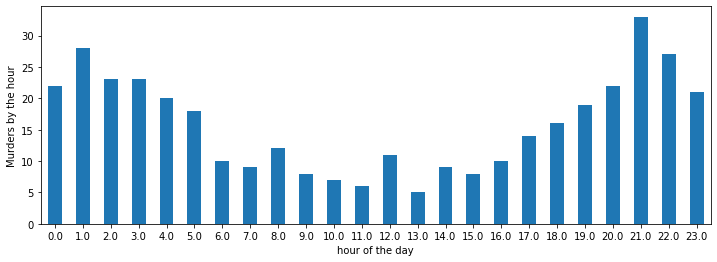

In [32]:
fig, axs = plt.subplots(figsize=(12, 4))
df.groupby(murder['date'].dt.hour)['crime_category'].count().plot(
    kind='bar',rot=0,ax=axs
)
plt.xlabel('hour of the day');
plt.ylabel('Murders by the hour')

Text(0.5, 1.0, 'Murders by Month')

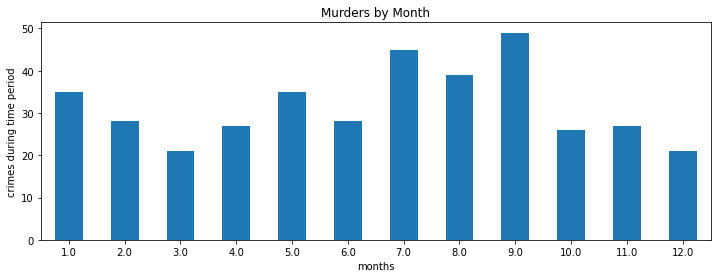

In [30]:
fig, axs = plt.subplots(figsize=(12, 4))
df.groupby(murder['date'].dt.month)['crime_category'].count().plot(
    kind='bar',rot=0,ax=axs
)
plt.xlabel('months');
plt.ylabel('crimes during time period')
plt.title('Murders by Month')

In [29]:
#apparently most murders happen in september

Text(0.5, 1.0, 'Murders by Month')

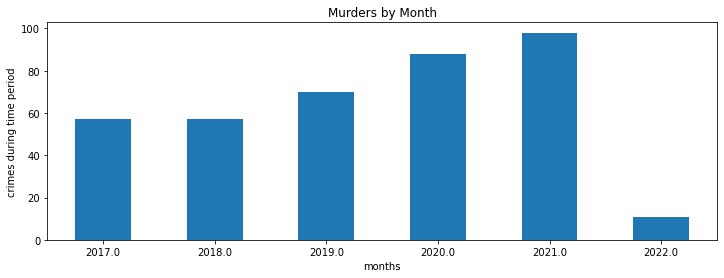

In [31]:
fig, axs = plt.subplots(figsize=(12, 4))
df.groupby(murder['date'].dt.year)['crime_category'].count().plot(
    kind='bar',rot=0,ax=axs
)
plt.xlabel('months');
plt.ylabel('crimes during time period')
plt.title('Murders by Month')